<h1>读取ROOT的tree数据，进行逐事件分析<span class="tocSkip"></span></h1><div class="toc"><ul class="toc-item">
   <li><span><a href="#一、学习目的" >一、学习目的</a></span></li>
    
   <li><span><a href="#二、具体的代码实施过程-李老师" >二、具体的代码实施过程-李老师</a></span></li>
    
   <li><span><a href="#三、验证是否存储正确" >三、验证是否存储正确</a></span></li>   
       
   <li><span><a href="#四、具体的代码实施过程-吴师兄" >四、具体的代码实施过程-吴师兄</a></span></li>
       
       
  </div>

# 一、学习目的

1、学习进行逐事件分析的方法
2、掌握中子探测器位置刻度、飞行时间刻度的方法
3、从实验测量值  tu,td,Qu,Qd  推出
学习数据分析的思路

# 二、具体的代码实施过程-李老师

In [1]:
TCanvas *c1=new TCanvas();//* 在ROOT环境下可省略
TH1D *hTOF= new TH1D("hTOF","Time of flight", 1000,0,100);

### 打开文件，得到TTree的指针

In [2]:
  TFile *Input_File=new TFile("tree.root");//打开ROOT文件
  if (Input_File->IsZombie()) {
   cout << "Error Open File" << endl;
   exit(-1);
  }
  Input_File->cd();
  TTree *tree=(TTree*)Input_File->Get("tree");//得到名字为“tree”的TTree指针

In [3]:
//声明所需要的参数，即需要输出的参数
 //* 入射粒子原始信息：粒子种类、能量，粒子在探测器上的入射位置、入射深度等
 //* 探测器信息: 两端时间信息 tu 、 td ，能量沉积信息 Qu , Qd 

Double_t X,Energy;                                              //应该是均匀分布
Int_t PID; //pid=1 is neutron、pid=0 is gamma
Double_t T_u,T_d,Q_u,Q_d;
Double_t TOF,cTOF;                                        //TOF:粒子实际飞行时间，cTOF：计算得到的TOF

### 声明tree的Branch变量

In [4]:
//3. 将变量指向对应Branch的地址
  tree->SetBranchAddress("cTOF",&cTOF);//将ROOT文件内tree内名为"ctof"的branch的数据的指针指向ctof的变量。
  tree->SetBranchAddress("TOF",&TOF);  
  tree->SetBranchAddress("PID",&PID);
  tree->SetBranchAddress("T_u",&T_u);   
  tree->SetBranchAddress("T_d",&T_d);
  tree->SetBranchAddress("Q_u",&Q_u);   
  tree->SetBranchAddress("Q_d",&Q_d);


### 为将新数据写入新的ROOT文件做准备

In [5]:
Double_t T2_u,T2_d;
Double_t cTOF2,cX;                                      

TFile *Output_File2=new TFile("tree2.root","recreate");
///Output_Tree->cd();
TTree *Output_Tree2=new TTree("tree2","tree2 structure");

Output_Tree2->Branch("T2_u",&T2_u,"T2_u/D");
Output_Tree2->Branch("T2_d",&T2_d,"T2_d/D");
Output_Tree2->Branch("cX",&cX,"cX/D");
Output_Tree2->Branch("cTOF2",&cTOF2,"cTOF2/D");

### 逐事件读取tree的branch数据

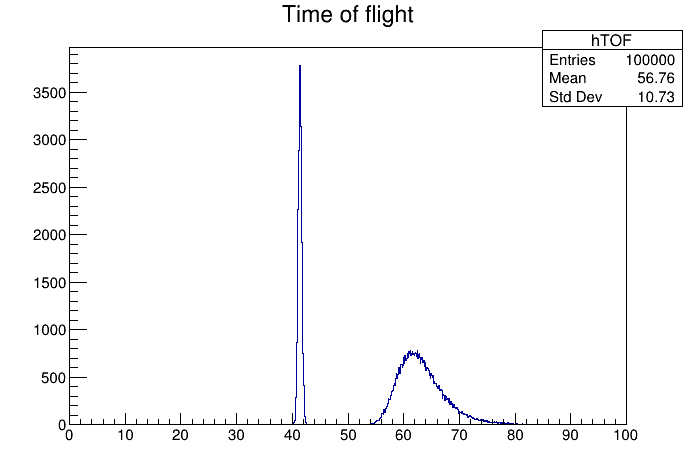

In [6]:
  Long64_t nentries=tree->GetEntries();//得到tree的事件总数
  for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
      tree->GetEntry(jentry);//将第jentry个事件数据填入对应变量(步骤3.中指向的变量)，每次变量值会变成当前事件对应的数据。
      hTOF->Fill(cTOF);
      // calculate new parameters
      T2_u=T_u;
      T2_d=T_d;
      cTOF2=(T2_u+T2_d)/2;
      cX=(T2_u-T2_d)/2;
      Output_Tree2->Fill();//fill new parameter to TTree* opt
  }
    hTOF->Draw();
    Input_File->Close();
    Output_Tree2->Write();
    Output_File2->Close();
    c1->Draw();

# 三、验证是否存储正确

In [7]:
%jsroot on
TFile *Input2_File=new TFile("tree2.root");
    Input2_File->ls()

TFile**		tree2.root	
 TFile*		tree2.root	
  KEY: TTree	tree2;1	tree2 structure


In [8]:
tree2->Print()

******************************************************************************
*Tree    :tree2     : tree2 structure                                        *
*Entries :   100000 : Total =         3211150 bytes  File  Size =    3023110 *
*        :          : Tree compression factor =   1.06                       *
******************************************************************************
*Br    0 :T2_u      : T2_u/D                                                 *
*Entries :   100000 : Total  Size=     802701 bytes  File Size  =     756131 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.06     *
*............................................................................*
*Br    1 :T2_d      : T2_d/D                                                 *
*Entries :   100000 : Total  Size=     802701 bytes  File Size  =     754012 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.06     *
*...................................................

In [9]:
c1->Clear();//* 在ROOT环境下可省略
tree2->Draw("T2_d-T2_u>>htx(500,-20,50)");//位置一维分布
c1->Draw();//* 在ROOT环境下可省略

In [10]:
c1->Clear();
tree2->Draw("cTOF2>>hh(1000,0,100)");//实际飞行时间
c1->Draw();

In [11]:
c1->Clear();
tree2->Draw("cX>>hh(1000,-50,50)");//实际飞行时间
c1->Draw();

In [12]:
c1->Clear();
tree2->Draw("T2_u-T2_d:cX");//实际飞行时间
c1->Draw();

# 四、具体的代码实施过程-吴师兄

In [13]:
  TFile *Input_File3=new TFile("tree.root");//打开ROOT文件
  if (Input_File3->IsZombie()) {
   cout << "Error Open File" << endl;
   exit(-1);
  }
  Input_File->cd();
  TTree *tree3=(TTree*)Input_File3->Get("tree");//得到名字为“tree”的TTree指针

  tree3->SetBranchAddress("cTOF",&cTOF);//将ROOT文件内tree内名为"ctof"的branch的数据的指针指向ctof的变量。
  tree3->SetBranchAddress("TOF",&TOF);  
  tree3->SetBranchAddress("PID",&PID);
  tree3->SetBranchAddress("T_u",&T_u);   
  tree3->SetBranchAddress("T_d",&T_d);
  tree3->SetBranchAddress("Q_u",&Q_u);   
  tree3->SetBranchAddress("Q_d",&Q_d);
  tree3->SetBranchAddress("X",&X);

In [14]:
Double_t T3_u,T3_d,Q3_u,Q3_d;
                                     
TFile *Output_File3=new TFile("tree3.root","recreate");
///Output_Tree->cd();
TTree *Output_Tree3=new TTree("tree3","tree3 structure");

Output_Tree3->Branch("T3_u",&T3_u,"T3_u/D");
Output_Tree3->Branch("T3_d",&T3_d,"T3_d/D");
Output_Tree3->Branch("Q3_u",&Q3_u,"Q3_u/D");
Output_Tree3->Branch("Q3_d",&Q3_d,"Q3_d/D");

TH1D *tdiff=new TH1D("tdiff","T3_d-T3_u",350,-20,50); 

In [15]:
c1->Clear();
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
      tree3->GetEntry(jentry);//将第jentry个事件数据填入对应变量(步骤3.中指向的变量)，每次变量值会变成当前事件对应的数据。
      // calculate new parameters
      T3_u=T_u;
      T3_d=T_d;
      Q3_u=Q_u;
      Q3_d=Q_d;
      cX=(T3_d-T3_u)/2;
      tdiff->Fill(cX*2);
  }
tdiff->Draw();
c1->Draw();


In [16]:
TH1D *dtd=new TH1D("dt_d","dt/dx",141,-20.25,50.25);

In [17]:
for(int i=1;i<=tdiff->GetNbinsX();i++) {
    Double_t df=tdiff->GetBinContent(i+1)-tdiff->GetBinContent(i);     //在bin中循环，在bin中得到内容
    dt_d->Fill(tdiff->GetBinLowEdge(i+1),df);      //在root里面自带误差传递
}

//dt_d->Sumw2(0);//不显示传递误差     =等价于在Draw中加“hist”
dt_d->Draw("hist");
dt_d->Fit("gaus","","",-14,-10.5);//txl，需要明白，边界
c1->Draw();

 FCN=0.390866 FROM MIGRAD    STATUS=CONVERGED      88 CALLS          89 TOTAL
                     EDM=3.36161e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.27678e+02   5.03503e+01   2.30138e-02   5.94398e-06
   2  Mean        -1.18375e+01   2.89856e-01   6.23726e-05  -1.40215e-03
   3  Sigma        5.44588e-01   1.11169e-01   1.36534e-05   4.80814e-03


拟合存在问题的原因是变化趋势的缘故,gaus函数不能拟合负数？

In [18]:
dt_d->Fit("gaus","","",39,45);//为什么拟合有问题？
c1->Draw();

 FCN=13.8135 FROM HESSE     STATUS=FAILED         11 CALLS         131 TOTAL
                     EDM=0    STRATEGY= 1  ERROR MATRIX UNCERTAINTY 100.0 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant    -1.08734e+05   1.41421e+00   0.00000e+00   0.00000e+00
   2  Mean        -1.18375e+01   1.41421e+00   0.00000e+00   0.00000e+00
   3  Sigma        5.44588e-01   3.25626e+00   0.00000e+00   0.00000e+00


In [19]:
TF1 *f1 = new TF1("f1","[0]*TMath::Exp(-0.5*((x-[1])/[2])^2)",40,43);//定义函数的方法 TF1，定义函数的方法
//需要按照顺序来写
//gaus:f(x) = p0*exp(-0.5*((x-p1)/p2)^2)

In [20]:
//进行参数拟合时，设置合理的初始参数至关重要！
c1->SetLogy(0);
f1->SetParameter(0,-350);           //大致估计范围
f1->SetParameter(1,41.5);          //参数的调节不太懂
f1->SetParameter(2,0.5);
dt_d->Fit("f1","R");
dt_d->Draw();
c1->Draw();

 FCN=1.05269 FROM MIGRAD    STATUS=CONVERGED      83 CALLS          84 TOTAL
                     EDM=2.81007e-11    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   2.3 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0          -1.22404e+02   5.55122e+01  -3.86349e-02   1.32354e-07
   2  p1           4.15932e+01   1.40621e-01  -4.95787e-05   6.24293e-05
   3  p2           5.70280e-01   1.01928e-01  -1.60923e-04  -5.00981e-05


In [21]:
const Double_t T3R=41.5834,T3L= -11.7698;

In [22]:
const Double_t Dis=500.,Len=100.,del_Dis=5.; //单位为cm，
Double_t t_xoff=(T3R+T3L)/2;         //计算度越时间，即传输时间
Double_t t_xon=(T3R-T3L)/2;

In [23]:
//位置刻度

In [24]:
TH1D *htx=new TH1D("htx","htx",500,-120,120);
TH2D *hdx=new TH2D("hdx","htx-hx:hx",100,-20,20,500,-120,120);

### 刻度后的结果

In [25]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree3->GetEntry(jentry);
    T3_u=T_u;
    T3_d=T_d;
    Q3_u=Q_u;
    Q3_d=Q_d;
    Double_t tx=Len/t_xon*(T3_d-T3_u-t_xoff);
    htx->Fill(tx);        
    hdx->Fill(tx-X,X);//difference    检查依赖关系，要求没有关系
  }
htx->Draw();
c1->Draw();

In [26]:
hdx->Draw("colz");//为一条竖线，没有关联
c1->Draw();

In [27]:
TH1D *hdx1=hdx->ProjectionX("projx of hdx");//投影
hdx1->Draw();
hdx1->Fit("gaus");//高斯拟合
c1->Draw();

 FCN=39.7941 FROM MIGRAD    STATUS=CONVERGED      65 CALLS          66 TOTAL
                     EDM=3.68377e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.05796e+03   2.72155e+01   6.96196e-02   2.55075e-09
   2  Mean        -3.39767e-02   7.14961e-03   2.22970e-05  -3.47017e-05
   3  Sigma        2.26009e+00   4.98626e-03   1.87998e-06  -7.25667e-05


In [28]:

c1->Clear();
tree3->Draw("cTOF>>(1000,20,120)");
c1->Draw();

### 对TOF进行飞行距离修正

In [29]:
//以上结果没有问题
TH2D *hgtofx=new TH2D("hgtofx","hgtofx",100,-120,120,100,7,9);
TH1D *hgctof=new TH1D("hgctof","hgctof",100,39,48);

In [30]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree3->GetEntry(jentry);
    T3_u=T_u;
    T3_d=T_d;
    Q3_u=Q_u;
    Q3_d=Q_d;
    Double_t tx=Len/t_xon*(T3_d-T3_u-t_xoff);
  
    if(cTOF>40&& cTOF<44) { //选择gamma
        Double_t d=TMath::Sqrt(502.5*502.5+tx*tx);
        Double_t cTOFa=(cTOF)/d*100.;//normalized to 500cm
       // cout<<cTOFa<<endl;
        hgtofx->Fill(tx,cTOFa);
        if(abs(tx)<5) hgctof->Fill(cTOF);//gamma hits the center of the det.
    }
  }
hgtofx->Draw("colz");
c1->Draw();

In [31]:
//击中中心
c1->Clear();
hgctof->Draw();
c1->Draw();

In [32]:
TH1D *hC=new TH1D("hC","",300,-40,-10);
TH2D *hCx=new TH2D("hCx","",100,-105,105,300,-26,-23);

In [33]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree3->GetEntry(jentry);
    T3_u=T_u;
    T3_d=T_d;
    Q3_u=Q_u;
    Q3_d=Q_d;
    Double_t tx=Len/t_xon*(T3_d-T3_u-t_xoff);
    
    if(tx>-100 && tx<100 && cTOF>40&& cTOF<44) {//gamma
        Double_t d=TMath::Sqrt(502.5*502.5+tx*tx);
        hC->Fill(3.333*d*0.01-cTOF);
        hCx->Fill(tx,3.333*d*0.01-cTOF);
    }
  }
hC->Draw("");
hC->Fit("gaus","","",-25,-24);
c1->Draw();

 FCN=4.25746 FROM MIGRAD    STATUS=CONVERGED      74 CALLS          75 TOTAL
                     EDM=1.25718e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.89344e+03   3.24420e+01   2.66777e-02  -1.11240e-06
   2  Mean        -2.45224e+01   2.37129e-03   1.16932e-05  -1.92041e-03
   3  Sigma        3.03612e-01   2.76196e-03   2.83229e-06   5.01887e-03


In [34]:
Double_t C=-24.4947;

In [35]:
hCx->Draw("colz");//检验C与x是否有关联
c1->Draw();

In [36]:
TH1D *htof=new TH1D("tof","",500,0,30);//real TOF, normalized to 500cm
TH1D *htofc=new TH1D("tofc","",500,0,30);//calculated TOF, normalized to 500cm
TH2D *htofcx=new TH2D("htofcx","htofcx",100,-120,120,100,2.5,4);

In [37]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree3->GetEntry(jentry);
    T3_u=T_u;
    T3_d=T_d;
    Q3_u=Q_u;
    Q3_d=Q_d;
    Double_t tx=Len/t_xon*(T3_d-T3_u-t_xoff);
    
    Double_t d=TMath::Sqrt(502.5*502.5+tx*tx); 
    Double_t TOF_d100=TOF/d*100;
    Double_t cTOF_d100=(cTOF+C)/d*100;
 //   cout<<TOF_d100<<endl;
    htof->Fill(TOF_d100);
    htofc->Fill(cTOF_d100);
    if(cTOF>40&& cTOF<42)
        htofcx->Fill(tx,(cTOF+C)/d*100);
  }

In [38]:
c1->SetLogy();
htofc->Draw();//修正后的飞行时间谱
htof->SetLineColor(kRed);
htof->Draw("same");
c1->Draw();

In [39]:
c1->SetLogy(0);
htofcx->Draw("colz");
c1->Draw();

In [40]:
TH1F *hce=new TH1F("hce","",500,0,200);//real TOF, normalized to 500cm
//TH1D *htofc=new TH1D("tofc","",500,0,30);//calculated TOF, normalized to 500cm
//TH2D *htofcx=new TH2D("htofcx","htofcx",100,-120,120,100,0,5);

In [41]:
for(Long64_t jentry=0; jentry<nentries; jentry++) {//对事件进行遍历
    tree3->GetEntry(jentry);
    T3_u=T_u;
    T3_d=T_d;
    Q3_u=Q_u;
    Q3_d=Q_d;
    
    Double_t tx=Len/t_xon*(T3_d-T3_u-t_xoff);
    
    Double_t d=TMath::Sqrt(502.5*502.5+tx*tx); 
    Double_t TOF_d100=TOF/d*100;
    Double_t cTOF_d100=(cTOF+C)/d*500;
    Energy=72.29824/cTOF_d100*(d*0.01)*72.29824/cTOF_d100*(d*0.01);
    hce->Fill(Energy);

  }

In [42]:
hce->Draw();
hce->Fit("gaus","","",40,160);
c1->Draw();

 FCN=308.501 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=7.61206e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.87080e+02   2.75245e+00   1.91388e-02   4.46954e-05
   2  Mean         9.38175e+01   7.28714e-02   6.23966e-04  -6.28198e-04
   3  Sigma        1.89193e+01   5.33372e-02   6.53958e-06   1.30517e-02


In [43]:
!jupyter nbconvert 1.2_Read_tree.ipynb --to html

[NbConvertApp] Converting notebook 1.2_Read_tree.ipynb to html


[NbConvertApp] Writing 4515943 bytes to 1.2_Read_tree.html


